# Some thoughts about the Titanic Shipwreck...

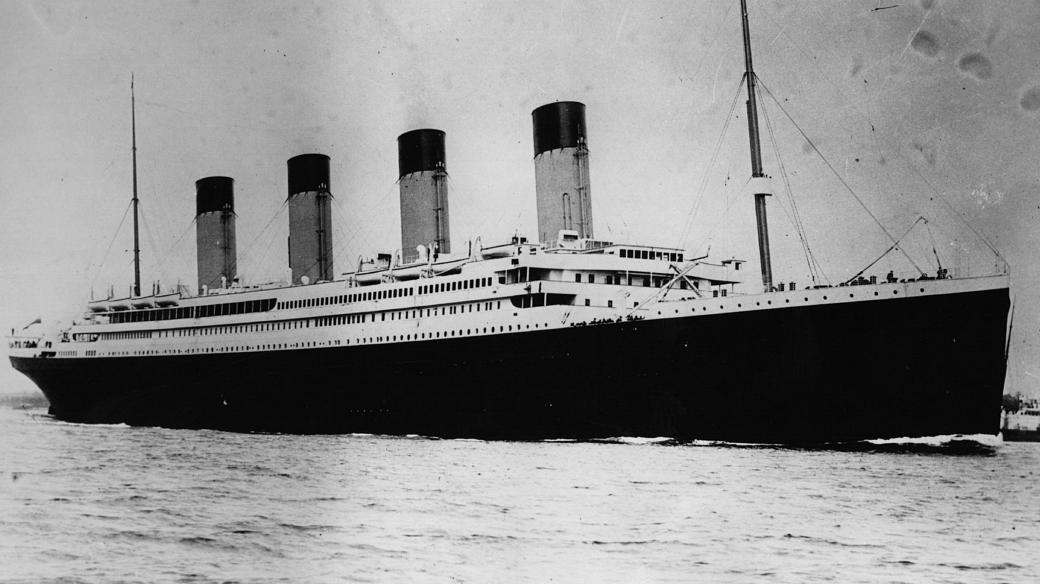

In [191]:
from IPython.display import Image, display
display(Image(filename='C:/Users/aleex/Desktop/titanic-foto-1912-original2.jpeg', embed=True))

The RMS Titanic, the biggest moveable man-made object of her day, was a a ship with **46,328 tons** and **269.1 meters** long. At the day of the tragedy, **2,222** people were on board (passengers and crew), with 49% of the passenger places unused. In total, there were an estimated **1,517** people killed in the sinking of the Titanic, **832** passengers and **685** crew members.

This is a brief analysis of the titanic dataset. 

**The major goals are**:

1. To verify if the ticket fare influences the survival of the passangers. In other words, people who paid more had a higher chance of surviving? 

2. To check if there is a significant difference between the survival of men and women.

3. To train, implement and evaluate a basic classification machine learning model to predict if a person died or lived based on presented features.

In [188]:
# We start by importing the modules that we will need and, also, importing the data as a CSV file.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [7, 5]


titanic_dataset = pd.read_csv(r'C:\Users\aleex\Desktop\titanic_dataset.csv', sep=',')

# Goal #1

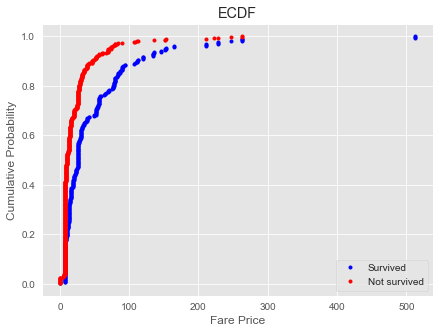

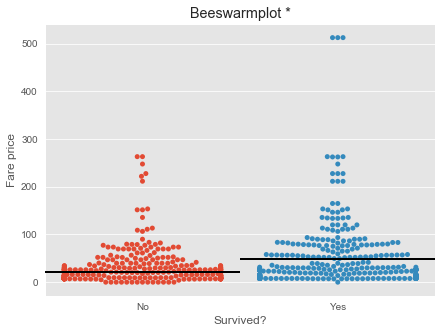

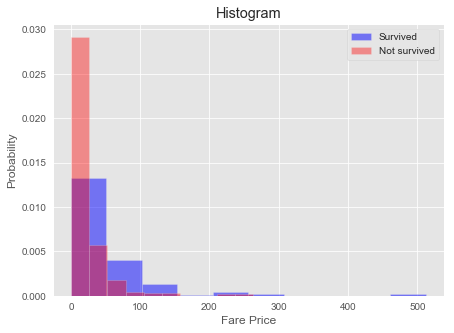

 Survived: 
 Mean fare:  48.39540760233917 ; Median fare:  26.0 
 
 Not survived: 
 Mean fare:  22.117886885245877 ; Median fare:  10.5


In [189]:
# Doing some exploratory data analysis

# Plotting a beeswarmplot and a ECDF of the fare paid by people who survived and not survived

fare_survived = titanic_dataset['Fare'][titanic_dataset['Survived'] == 1]
fare_survived = fare_survived[np.logical_not(np.isnan(fare_survived))] # remove any missing values
fare_not_survived = titanic_dataset['Fare'][titanic_dataset['Survived'] == 0]
fare_not_survived = fare_not_survived[np.logical_not(np.isnan(fare_not_survived))] # remove any missing values

def ecdf(data):
    n = len (data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

x_survived, y_survived = ecdf(fare_survived)
x_not_survived, y_not_survived = ecdf(fare_not_survived)


# ECDF
plt.plot(x_survived, y_survived, marker = '.', linestyle = 'none', color = 'blue')
plt.plot(x_not_survived, y_not_survived, marker = '.', linestyle = 'none', color = 'red')
plt.title('ECDF')
plt.xlabel('Fare Price')
plt.ylabel('Cumulative Probability')
plt.legend(('Survived', 'Not survived'), loc='lower right')
plt.show()

# Beeswarmplot
sns.swarmplot(x = 'Survived', y = 'Fare', data = titanic_dataset)
plt.title('Beeswarmplot *')
plt.ylabel('Fare price')
plt.xlabel('Survived?')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.hlines(np.mean(fare_survived),0.5,1.5, colors='k', linewidth = 2, zorder = 10)
plt.hlines(np.mean(fare_not_survived),-1.5,0.5, colors='k', linewidth = 2, zorder = 10)
plt.show()

# Histogram
plt.hist(fare_survived, alpha = 0.5, color='blue', density=True)
plt.hist(fare_not_survived, alpha = 0.4, color='red', density=True)
plt.title('Histogram')
plt.xlabel('Fare Price')
plt.ylabel('Probability')
plt.legend(('Survived', 'Not survived'), loc = 'upper right')
plt.show()

print(
' Survived: \n',
'Mean fare: ', np.mean(fare_survived), ';', 'Median fare: ', np.median(fare_survived), '\n \n',
'Not survived: \n',
'Mean fare: ', np.mean(fare_not_survived), ';', 'Median fare: ', np.median(fare_not_survived)
    )

* The horizontal lines in the beeswarmplot are the mean fare paid by non survivors and survivors, respectively.

It is possible to see that the average and the median fare price is higher for passangers who survived. However, we can't be sure if the observed difference in the fare price distribution and the difference in the average values of the two groups are really significant. Therefore, we have two question to ask:

1. The observed difference in the distributions of the fare values is really significant?
2. The observed difference in the average fare value is really significant?

To adress these questions, if the difference in fare distribution for the group who survived and the group who don't is really significant our could had happened by chance, it's possible to do a hypothesis test.

# Hypothesis test for Goal #1

## Hypothesis test 1 (difference in distribution)

Null hypothesis: There is no difference in the distribution of the fare price paid by those who survived and those who don't.

We will perform a bootstrap test, with the test statistics as the difference between the two means. We will test for the probability of getting at least the observed average difference, under the hypothesis that there is no difference between the distribution of fare price of those who survived and those who don't.

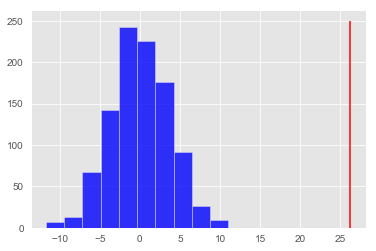

p-value:  0.0


In [96]:
# Defining a fuction to permutate the samples

def permutation_sample(data1, data2):

    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Function to draw permutation replicates of the test statistics

def draw_perm_reps(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Function to calculate the difference between the averages of the two groups

def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)


# Applying those on our problem, generating 1,000 bootstrap permutation replicates

perm_replicates = draw_perm_reps(fare_survived, fare_not_survived, diff_of_means, 1000)

# Computing the p-value for the test statistics

observed_diff = np.mean(fare_survived) - np.mean(fare_not_survived)
p_value = np.sum(perm_replicates >= observed_diff) / len(perm_replicates)

# Histogram of the test statistics for the permutation replicates

plt.hist(perm_replicates, color='blue', alpha=0.8)
plt.vlines(observed_diff, 0, 250, colors='red')
plt.show()

print('p-value: ', p_value)



In the above histogram, the red line is the observed difference in the average fare price of the two groups. Furthermore, we got a p-value of 0, which means that none of the permutation replicates was as extreme as the observed value. So, we can conclude that the distribution of fare values is significantly different.

## Hypothesis test 2 (difference in means)

Now, we will test if the observed difference in the average values for fare prices is really significant. In order to do that, we will again perform a bootstrap test assuming that there is no difference in the mean value of the two groups.

Null hypothesis: There is no difference in the average fare value paid for those who survived and those who don't.

Again, our test statistic will be the average fare value.

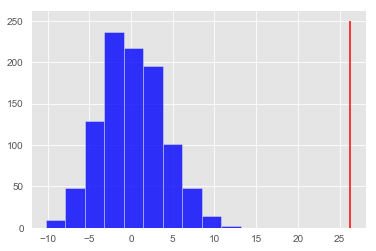

p-value:  0.0


In [97]:
# Generating shifted arrays so that the two means are equal. We will use the shifted arrays to test the null hypothesis.

mean_fare = np.mean(np.concatenate((fare_survived, fare_not_survived)))

shifted_fare_survived = fare_survived - np.mean(fare_survived) + mean_fare
shifted_fare_not_survived = fare_not_survived - np.mean(fare_not_survived) + mean_fare

# Defining a function to compute bootstrap replicates

def draw_bs_replicates(data, func, size = 1):
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_sample = np.random.choice(data, size = len(data))
        bs_replicates[i] = func(bs_sample)
        
    return bs_replicates

# Using the function above to generate 1,000 bootstrap replicates of the shifted array

survived_bs_replicates = draw_bs_replicates(shifted_fare_survived, np.mean, 1000)
not_survived_bs_replicates = draw_bs_replicates(shifted_fare_not_survived, np.mean, 1000)

bs_replicates_diff = survived_bs_replicates - not_survived_bs_replicates

# Computing the p-value

p_value = np.sum(bs_replicates_diff >= observed_diff) / len(bs_replicates_diff)

# Histogram of the test statistic for the bootstrap replicates

plt.hist(bs_replicates_diff, color = 'blue', alpha = 0.8)
plt.vlines(observed_diff, 0, 250, colors='red')
plt.show()

print('p-value: ', p_value)


As can be seen by the histogram and the p-value, there is a significant difference in the average price value of the fares paid by the two groups. So, now we have enough evidence to conclude that the price paid for the ticket was a relevant feature that contributed to the survival of the passangers. **People who paid more had more chance of surviving**. 

# Goal #2

In [86]:
# Checking the percentage of women and men who survived

man_array = titanic_dataset['Survived'][titanic_dataset['Sex'] == 'male']
woman_array = titanic_dataset['Survived'][titanic_dataset['Sex'] == 'female']

percent_man_survived = np.sum(man_array) / len(man_array)
percent_woman_survived = np.sum(woman_array) / len(woman_array)

print(' Fraction of men who survived: ', percent_man_survived, '\n',
      'Fraction of woman who survived: ',percent_woman_survived)

 Fraction of men who survived:  0.18890814558058924 
 Fraction of woman who survived:  0.7420382165605095


The fraction of woman who survived is far more expressive than the fraction of man who survived the shipwreck. Althought, it is still pertinent to ask if this difference is statistically significant or not. To adress the question, we will do a hypothesis test.

## Hypothesis test for goal #2

Now, our test statistic will be the fraction of man or woman who survived. We will use, again, the bootstrap method to generate a thousand permutation replicates of our test statistic. Finally, we will compute the p-value for the null hypothesis, which is: There is no difference between the fraction of men and women who survived. 

In [92]:
# Defining auxiliary functions

def fraction_of_survival(data):
    return np.sum(data) / len(data)

def diff_of_fraction(data_1, data_2):
    return fraction_of_survival(data_1) - fraction_of_survival(data_2)

# Generating 1,000 bootstrap replicates of the test statistics

diff_frac_replicates = draw_perm_reps(woman_array, man_array, diff_of_fraction, 10000)

# Computing the p-value

obs_diff = percent_woman_survived - percent_man_survived

p_value = np.sum(diff_frac_replicates >= obs_diff) / len(diff_frac_replicates)

print('p-value: ', p_value)


    

p-value:  0.0


As expected, the low p-value indicates that there is a significant difference between the surviving rates of man and woman. So, in the case of the titanic shipwreck, **woman had a higher chance of surviving than men**.

# Checking the historical facts

Some historical facts about the titanic can help explaining the results we got. First, about the rate of survival of man and woman, it is well known that "Woman and children first" was the code of conduct followed by that time in any life-threatening situation. It means that woman and children had priority to get to the boats. The order, gave by the Captain, is recognized in one of the officials timelines concerning the accident.

> 12:20am : Captain Smith gives the order to start loading the lifeboats on the Titanic, women and children first. At this point the Captain will have realised that the deaths of many hundreds of passengers and crew is inevitable.

<div style="text-align: right"> Source: [titanicfacts.net](https://titanicfacts.net/titanic-timeline/) </div> 

To help explaining the influence of fare price, it seems that the class of a passanger (first, second or third-class) had a big impact on survival. But not in the way that the latest Oscar winning Titanic film depicts it. In the film, the scene in which third-class passengers are locked below decks is recognized as myth.

However, the architecture of the ship may have favored first-class passangers because their cabins were closer to the boat deck. As one of the most recognized explanations for the situation puts it:

> More of the first class passengers survived because their cabins were closer to the lifeboats and many of the emigrants in third class died because their poor English meant they did not understand what was happening. And other evidence states that there were many barriers between steerage and the rest of the ship, and that most of them stayed up. In addition some third-class passengers were denied initial access to the boats by sailors who forbade them to enter the first-class area.

<div style="text-align: right"> Source: [independent.co.uk](www.independent.co.uk/voices/did-the-third-class-passengers-on-the-titanic-have-a-fair-chance-1155678.html) </div>
           


Therefore, as the fare price rises proportionally to the class of a passanger, these historical facts help to corroborate the presented data results.

# Goal #3

To implement a simple classification model in order to predict wheter a passenger survived or not, we will use the K-Nearest Neighbors algorithm. Three major features can influence the probability of survival in this case: sex, age, and the price of the fare. However, sex is a categorical feature and its implementation led to a little decrease of the model's performance. So, we will only use Age and Fare as our features. The target variable is, of course, the categorical 'Yes' or 'No' for survival.

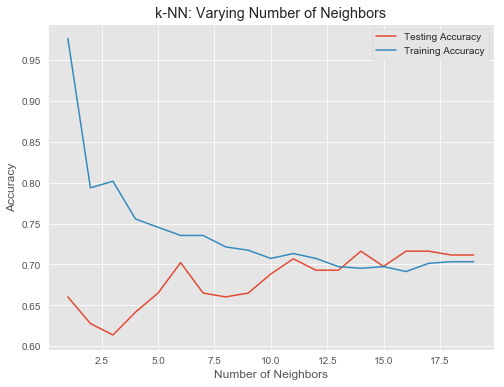

In [186]:
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model_data = titanic_dataset[['Sex','Age','Fare','Survived']]
model_data.dropna(inplace=True)
model_data['Survived'] = model_data['Survived'].replace({0: 'No', 1: 'Yes'})
model_data['Sex'] = model_data['Sex'].replace({'male': 0, 'female': 1})


X = model_data[['Age','Fare']]
y = model_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y)

neighbors = np.arange(1,20)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()



As it can be seen by the chart above, we generally get an underfitting region for less than 5 neighbors. In general, more than 10 neighbors led to average better performance. As expected, the training accuracy decreases as the number of neighbors increases, because the model is getting more generalized. For a nice fit, it can be stated that the model correctly predicts about 70% of the time under the test data.